# Data Preparation and Visualization

* The usual suspects:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns

#Set figure size
plt.rcParams["figure.figsize"] = [12, 8]
sns.set_style("darkgrid")

Check files in directory here

In [3]:
filenames = glob.glob(r'C:/Users/chazzers/Desktop/Recordings/Results/Liz/*.csv')

In [4]:
#Displays the file names (if you want to check what is going in)
filenames

['C:/Users/chazzers/Desktop/Recordings/Results/Liz\\10_Liz_21_01_21_4pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\11_Liz_21_01_21_5pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\12_Liz_25_1_21_2pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\13_Liz_25_1_21_3pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\14_Liz_26_1_21_2pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\15_Liz_28_01_21_6pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\16_Liz_01_02_21_10am.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\17_Liz_02_02_21_2pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\18_Liz_05_02_21_2pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\19_Site_Safety_Liz.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\2_Liz_12_01_21_3pm.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\3_Liz_13_01_21_9am.csv',
 'C:/Users/chazzers/Desktop/Recordings/Results/Liz\\4_Liz_13_01_21_10

Import files into a single dataframe

In [5]:
#index_col makes the instance the row number
dataframes = [pd.read_csv(f,index_col=0) for f in glob.glob(r'C:/Users/chazzers/Desktop/Recordings/Results/Liz/*.csv')]

## unhash to double check
# dataframes

Removing the path name to keep the title of the video

In [6]:
#Removing the path name to keep the title of the video
vid_name = []
for vid in filenames:
    vid_name.append(vid.replace("C:/Users/chazzers/Desktop/Recordings/Results/Liz\\", ""))
    
## unhash to double check the list is correct
#vid_name

**Splitting emotions into negative and positive and taking the mean**

In [7]:
#average of negative and positive valence emotions
for df in dataframes:
    df['neg_val'] = np.mean(df[['fear','disgust','angry','sad']],axis=1)
    
for df in dataframes:
    df['pos_val'] = np.mean(df[['happy','surprise']],axis=1)

Taking a rolling average of these (length of the rolling average = 2% the length of the dataframe)

In [8]:
#rolling averages of positive, negative and neutral valence
for df in dataframes:
    three_percent_len = int(len(df)*0.02)
    df['neg_val_roll'] = df['neg_val'].rolling(window = three_percent_len).mean()
    
for df in dataframes:
    three_percent_len = int(len(df)*0.02)
    df['pos_val_roll'] = df['pos_val'].rolling(window = three_percent_len).mean()
    
for df in dataframes:
    three_percent_len = int(len(df)*0.02)
    df['neutral_roll'] = df['neutral'].rolling(window = three_percent_len).mean()

Plot one to check

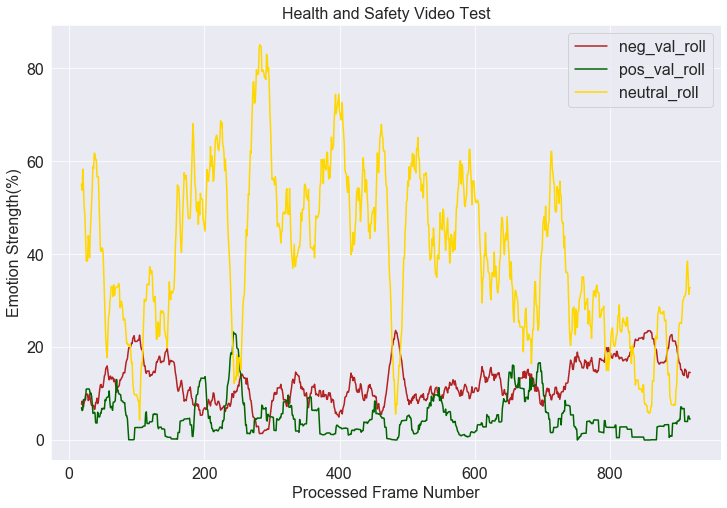

In [11]:
dataframes[0]["neg_val_roll"].plot(c = "firebrick")
dataframes[0]["pos_val_roll"].plot(c = "darkgreen")
dataframes[0]["neutral_roll"].plot(c = "gold")

plt.legend()
plt.xlim()
plt.ylim()
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(fontsize = 16)
plt.ylabel('Emotion Strength(%)',fontsize = 16)
plt.xlabel('Processed Frame Number',fontsize = 16)
plt.title('Health and Safety Video Test',fontsize = 16)
plt.legend(fontsize = 16)

#Unhash to save as .png
# plt.savefig(r'C:\Users\Desktop\Recordings\Results\Graphs\Site_Safety_Vid_pos_neg_zoom.png',dpi=1200,bbox_inches='tight')

**getting data to compare the scores from videos to eachother**

In [13]:
#list of median of positive emotions for each video
pos_avg =[]
for df in dataframes:
    pos_avg.append(df['pos_val'].median())
    
#list of median of negative emotions for each video
neg_avg =[]
for df in dataframes:
    neg_avg.append(df['neg_val'].median())
    
#list of median of neutral emotions for each video
neutral_avg =[]
for df in dataframes:
    neutral_avg.append(df['neutral'].median())

putting them into dataframes so we can use them with other data later

In [17]:
pos_avg_df = pd.DataFrame(pos_avg)
neg_avg_df = pd.DataFrame(neg_avg)
neutral_avg_df = pd.DataFrame(neutral_avg)

Making a list with the variance of each emotion in each video

In [23]:
variances = []
for df in dataframes:
    variances.append(df.iloc[:, 0:7].var())

#Checking the output:
df.iloc[:, 0:7].var()

fear         675.394841
disgust        0.576571
angry         96.084932
neutral      514.194032
happy        655.539601
surprise     134.461560
sad         1014.422278
dtype: float64

putting the list of variances in a dataframe

In [24]:
var_df = pd.DataFrame(variances)

#Checking the output:
var_df

,fear,disgust,angry,neutral,happy,surprise,sad
0,482.796601,0.006259,52.303637,1471.728613,394.510208,159.948938,1187.944310
1,372.159654,0.028325,37.561357,1157.668372,175.385545,183.888768,477.729578
2,873.660433,1.137922,623.517301,989.827622,651.239833,15.931696,846.692524
3,909.898356,1.532083,219.833535,762.115298,333.027734,59.408058,1182.259390
4,325.168192,18.589288,69.902363,1172.004437,5.943787,16.345826,1166.607781
5,645.945286,0.179413,60.600100,1438.629070,318.851561,76.995331,1231.040924
6,868.156873,1.791293,536.812535,814.797201,1241.290063,69.275020,890.844834
7,797.227673,1.791135,231.676804,1074.260075,496.119655,85.415051,1030.359759
8,957.487508,6.230960,395.219054,651.596257,167.477583,39.132244,822.595566
9,780.667659,0.009688,610.444308,681.684137,184.904205,14.607083,773.257371


Getting the average variance for all emotions in each video *except* neutral and adding it to our dataframe

In [27]:
var_df['avg_variance'] = var_df[['happy','sad','angry','fear','disgust','surprise']].mean(axis=1)

#Checking output:
var_df['avg_variance']

0     379.584992
1     207.792204
2     502.029951
3     450.993193
4     267.092873
5     388.935436
6     601.361769
7     440.431680
8     398.023819
9     393.981719
10    409.532118
11    497.976491
12    480.030150
13    486.736419
14    564.375893
15    374.071112
16    429.413297
Name: avg_variance, dtype: float64

finding the average variance across all videos

In [28]:
avg_overall_variance = float(var_df['avg_variance'].mean())
avg_overall_variance

427.7860657075817

finding the average positive, negative and neutral emotion strength across all videos

In [30]:
avg_overall_pos = float(pos_avg_df.mean())
avg_overall_neg = float(neg_avg_df.mean())
avg_overall_neutral = float(neutral_avg_df.mean())

print(avg_overall_pos, avg_overall_neg, avg_overall_neutral)

0.17147252840938615 19.00062298734369 12.779119066923554


making a column with the average overall variance as a constant value so we can plot it easily later on

In [31]:
var_df['avg_overall_variance'] = avg_overall_variance

naming the videos in the dataframe so that we can merge this data with the questionnaire data later on

In [32]:
var_df['video_name'] = vid_name

check the dataframe:

In [33]:
var_df

,fear,disgust,angry,neutral,happy,surprise,sad,avg_variance,avg_overall_variance,video_name
0,482.796601,0.006259,52.303637,1471.728613,394.510208,159.948938,1187.944310,379.584992,427.786066,10_Liz_21_01_21_4pm.csv
1,372.159654,0.028325,37.561357,1157.668372,175.385545,183.888768,477.729578,207.792204,427.786066,11_Liz_21_01_21_5pm.csv
2,873.660433,1.137922,623.517301,989.827622,651.239833,15.931696,846.692524,502.029951,427.786066,12_Liz_25_1_21_2pm.csv
3,909.898356,1.532083,219.833535,762.115298,333.027734,59.408058,1182.259390,450.993193,427.786066,13_Liz_25_1_21_3pm.csv
4,325.168192,18.589288,69.902363,1172.004437,5.943787,16.345826,1166.607781,267.092873,427.786066,14_Liz_26_1_21_2pm.csv
5,645.945286,0.179413,60.600100,1438.629070,318.851561,76.995331,1231.040924,388.935436,427.786066,15_Liz_28_01_21_6pm.csv
6,868.156873,1.791293,536.812535,814.797201,1241.290063,69.275020,890.844834,601.361769,427.786066,16_Liz_01_02_21_10am.csv
7,797.227673,1.791135,231.676804,1074.260075,496.119655,85.415051,1030.359759,440.431680,427.786066,17_Liz_02_02_21_2pm.csv
8,957.487508,6.230960,395.219054,651.596257,167.477583,39.132244,822.595566,398.023819,427.786066,18_Liz_05_02_21_2pm.csv
9,780.667659,0.009688,610.444308,681.684137,184.904205,14.607083,773.257371,393.981719,427.786066,19_Site_Safety_Liz.csv


Importing the PANAS and Engagement Self-Rating Questionnaire Scores:

In [35]:
engagement_PA_NA = pd.read_csv(r'C:/Users/chazzers/Desktop/Recordings/Results/Engage_Liz.csv')
engagement_PA_NA

,Session,PA,NA,Engagement,video_name,Interactive
0,2,0.100,0.050,5,2_Liz_12_01_21_3pm.csv,yes
1,3,0.325,0.000,6,3_Liz_13_01_21_9am.csv,no
2,4,0.100,0.025,3,4_Liz_13_01_21_10am.csv,yes
3,5,0.200,0.050,4,5_Liz_15_01_21_2pm.csv,no
4,6,0.400,0.050,3,6_Liz_15_01_21_3pm.csv,no
5,8,0.000,0.000,5,8_Liz_19_01_21_2pm.csv,no
6,9,0.425,0.050,3,9_Liz_19_01_21_2pm.csv,yes
7,10,0.375,0.000,4,10_Liz_21_01_21_4pm.csv,no
8,11,0.750,0.075,7,11_Liz_21_01_21_5pm.csv,yes
9,12,0.050,0.000,5,12_Liz_25_1_21_2pm.csv,no


Merge the datasets conatining video data and questionnaire data:

In [38]:
video_stats = pd.merge(var_df,engagement_PA_NA, on='video_name', how='inner')
video_stats

,fear,disgust,angry,neutral,happy,surprise,sad,avg_variance,avg_overall_variance,video_name,Session,PA,NA,Engagement,Interactive
0,482.796601,0.006259,52.303637,1471.728613,394.510208,159.948938,1187.944310,379.584992,427.786066,10_Liz_21_01_21_4pm.csv,10,0.375,0.000,4,no
1,372.159654,0.028325,37.561357,1157.668372,175.385545,183.888768,477.729578,207.792204,427.786066,11_Liz_21_01_21_5pm.csv,11,0.750,0.075,7,yes
2,873.660433,1.137922,623.517301,989.827622,651.239833,15.931696,846.692524,502.029951,427.786066,12_Liz_25_1_21_2pm.csv,12,0.050,0.000,5,no
3,909.898356,1.532083,219.833535,762.115298,333.027734,59.408058,1182.259390,450.993193,427.786066,13_Liz_25_1_21_3pm.csv,13,0.100,0.000,4,no
4,325.168192,18.589288,69.902363,1172.004437,5.943787,16.345826,1166.607781,267.092873,427.786066,14_Liz_26_1_21_2pm.csv,14,0.325,0.000,7,no
5,645.945286,0.179413,60.600100,1438.629070,318.851561,76.995331,1231.040924,388.935436,427.786066,15_Liz_28_01_21_6pm.csv,15,0.125,0.050,2,yes
6,868.156873,1.791293,536.812535,814.797201,1241.290063,69.275020,890.844834,601.361769,427.786066,16_Liz_01_02_21_10am.csv,16,0.300,0.025,4,yes
7,797.227673,1.791135,231.676804,1074.260075,496.119655,85.415051,1030.359759,440.431680,427.786066,17_Liz_02_02_21_2pm.csv,17,0.300,0.025,4,no
8,957.487508,6.230960,395.219054,651.596257,167.477583,39.132244,822.595566,398.023819,427.786066,18_Liz_05_02_21_2pm.csv,18,0.150,0.025,5,no
9,780.667659,0.009688,610.444308,681.684137,184.904205,14.607083,773.257371,393.981719,427.786066,19_Site_Safety_Liz.csv,19,0.150,0.025,4,NaN


Adding the columns containing positive and negative emotion values

In [39]:
video_stats['pos_avg'] = pos_avg_df
video_stats['neg_avg'] = neg_avg_df
video_stats['neutral_avg'] = neutral_avg_df
video_stats['avg_overall_neg'] = avg_overall_neg
video_stats['avg_overall_pos'] = avg_overall_pos
video_stats['avg_overall_neutral'] = avg_overall_neutral

**Making the samples relative to themselves:**

finding the difference between average emotion in each video video and average emotion for all videos

In [44]:
video_stats['pos_diff'] = pos_avg_df - avg_overall_pos
video_stats['neg_diff'] = neg_avg_df - avg_overall_neg
video_stats['neutral_diff'] = neutral_avg_df - avg_overall_neutral

Same process for variance

In [45]:
video_stats['var_diff'] = video_stats['avg_overall_variance'] - video_stats['avg_variance']

getting the differences between the highest and lowest values for emotions and variance

In [46]:
variance_min_max_diff = video_stats["var_diff"].max() -     video_stats["var_diff"].min()
pos_min_max_diff =      video_stats["pos_diff"].max() -     video_stats["pos_diff"].min()
neg_min_max_diff =      video_stats["neg_diff"].max() -     video_stats["neg_diff"].min()
neutral_min_max_diff =  video_stats["neutral_diff"].max() - video_stats["neutral_diff"].min()

Turning that into percentage difference

In [47]:
video_stats["percent_diff_var"] = (video_stats["var_diff"]/variance_min_max_diff)*100
video_stats["percent_diff_pos"] = (video_stats["pos_diff"]/pos_min_max_diff)*100
video_stats["percent_diff_neg"] = (video_stats["neg_diff"]/neg_min_max_diff)*100
video_stats["percent_diff_neutral"] = (video_stats["neutral_diff"]/neutral_min_max_diff)*100

In [48]:
## Unhash to check the output
# video_stats

**Plotting the outputs:**

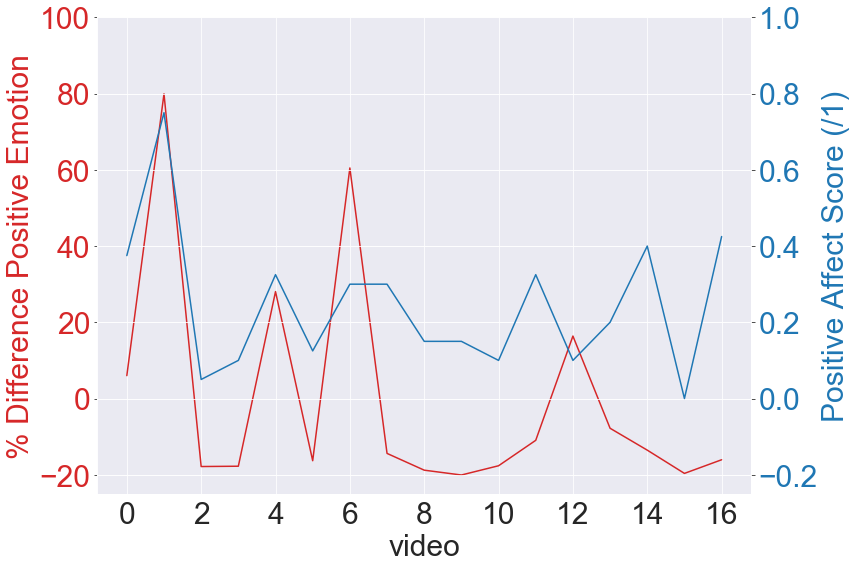

In [49]:
t = video_stats.index
data1 = video_stats['percent_diff_pos']
data2 = video_stats["PA"]

fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('video',fontsize= 30)
ax1.set_ylabel('% Difference Positive Emotion', color=color1,fontsize= 30)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
plt.yticks(fontsize= 30)
plt.xticks(fontsize= 30)
plt.ylim(-25,100)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Positive Affect Score (/1)', color=color2,fontsize= 30)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.yticks(fontsize= 30)
plt.ylim(-0.25,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(r'C:\Users\chazzers\Desktop\Recordings\Results\Graphs\PA_Emotion_Liz.png',dpi=1200,bbox_inches='tight')

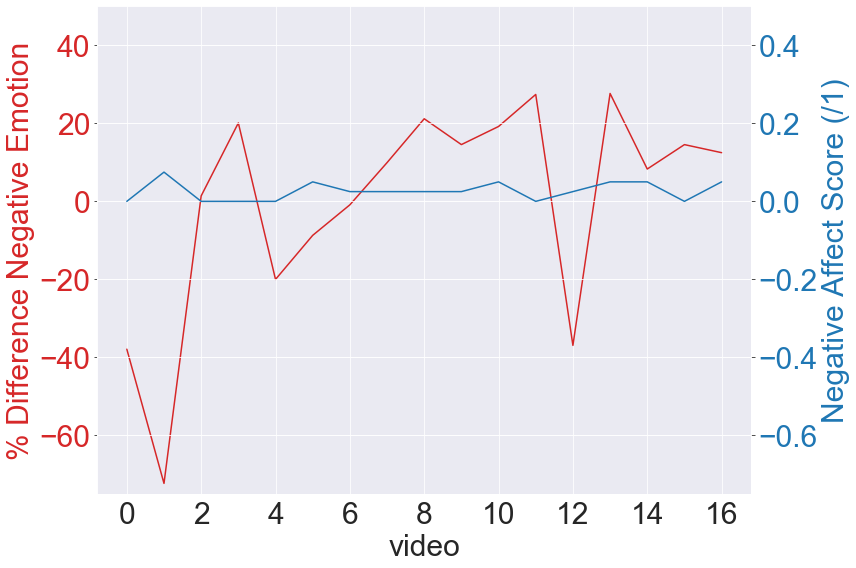

In [51]:
t = video_stats.index
data1 = video_stats['percent_diff_neg']
data2 = video_stats["NA"]

fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('video',fontsize= 30)
ax1.set_ylabel('% Difference Negative Emotion', color=color1,fontsize= 30)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
plt.yticks(fontsize= 30)
plt.xticks(fontsize= 30)
plt.ylim(-75,50)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Negative Affect Score (/1)', color=color2,fontsize= 30)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.yticks(fontsize= 30)
plt.ylim(-0.75,0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(r'C:\Users\chazzers\Desktop\Recordings\Results\Graphs\NA_Emotion_Liz.png',dpi=1200,bbox_inches='tight')

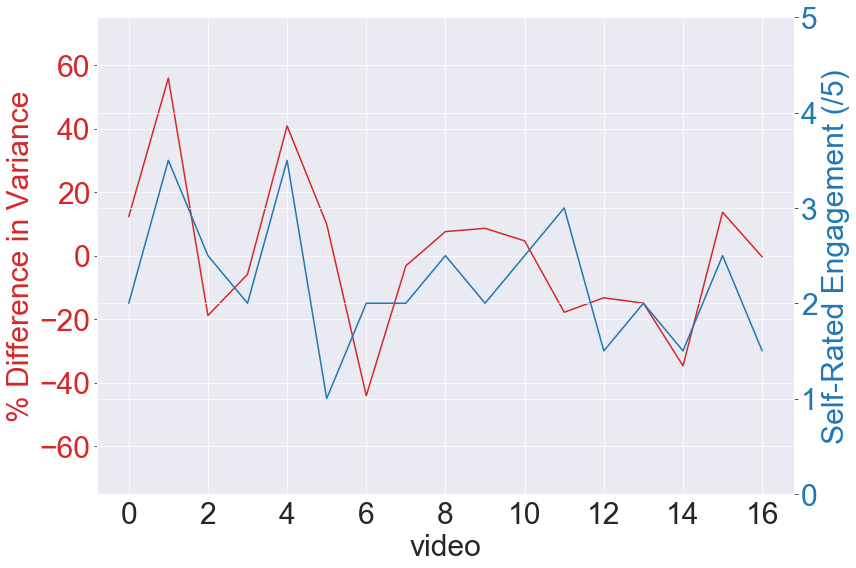

In [52]:
#Comparing variance and neutral
t = video_stats.index
data1 = video_stats['percent_diff_var']
data2 = video_stats["Engagement"]/2

fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('video',fontsize= 30)
ax1.set_ylabel('% Difference in Variance', color=color1,fontsize= 30)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
plt.yticks(fontsize= 30)
plt.xticks(fontsize= 30)
plt.ylim(-75,75)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Self-Rated Engagement (/5)', color=color2,fontsize= 30)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.yticks(fontsize= 30)
plt.ylim(0,5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(r'C:\Users\chazzers\Desktop\Recordings\Results\Graphs\Var_Engagement_Liz.png',dpi=1200,bbox_inches='tight')

(-0.05, 1)

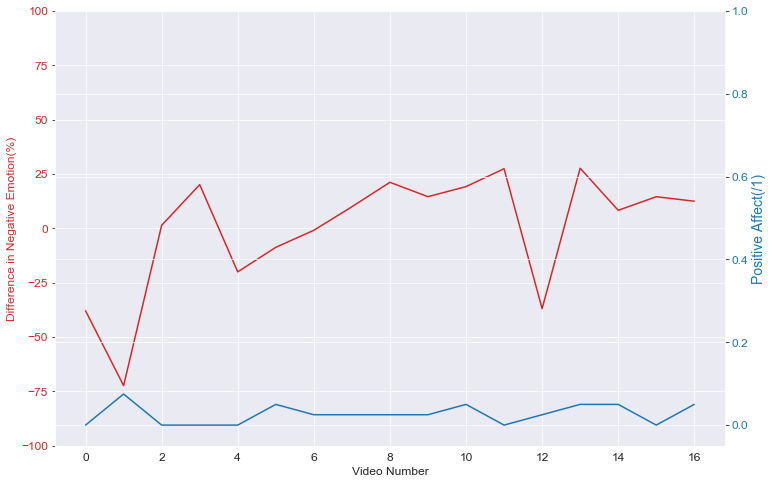

In [60]:
#Comparing positive diff and PA
t = video_stats.index
data1 = video_stats['percent_diff_neg']
data2 = video_stats['NA']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Video Number',fontsize= 12)
ax1.set_ylabel('Difference in Negative Emotion(%)', color=color,fontsize= 12)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylim(-100,100)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Positive Affect(/1)', color=color,fontsize= 14)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize= 12)
plt.ylim(-0.05,1)

# plt.savefig(r'C:\Users\chazzers\Desktop\Recordings\Results\Graphs\NA_Emotion_Charles.png',dpi=1200,bbox_inches='tight')

(0, 10)

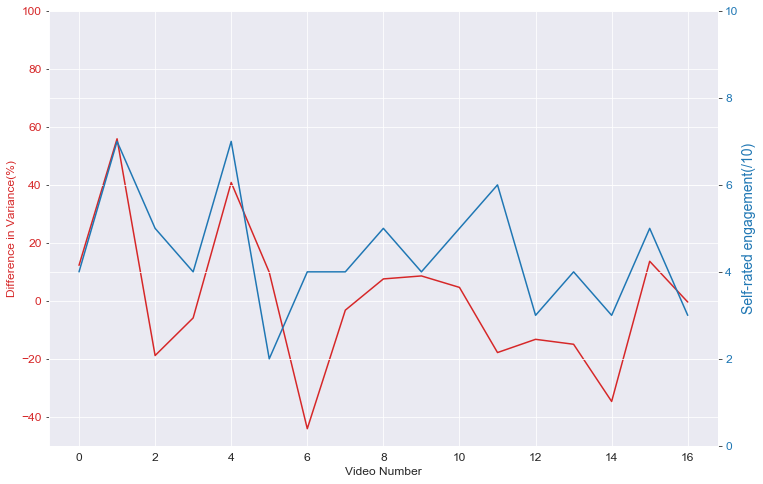

In [66]:
#Comparing variance and perceived engagement
t = video_stats.index
data1 = video_stats['percent_diff_var']
data2 = video_stats["Engagement"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Video Number',fontsize= 12)
ax1.set_ylabel('Difference in Variance(%)', color=color,fontsize= 12)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylim(-50,100)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Self-rated engagement(/10)', color=color,fontsize= 14)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize= 12)
plt.ylim(0,10)

# plt.savefig(r'C:\Users\chazzers\Desktop\Recordings\Results\Graphs\Var_Engagement_Charles.png',dpi=1200,bbox_inches='tight')

In [432]:
#Making a list of variances so that I can add them to the title of the subplots below
listofvars = video_stats["avg_variance"]

In [438]:
video_stats["avg_variance"].mean()

427.7860657075817

General plot of all the frames to have an overview

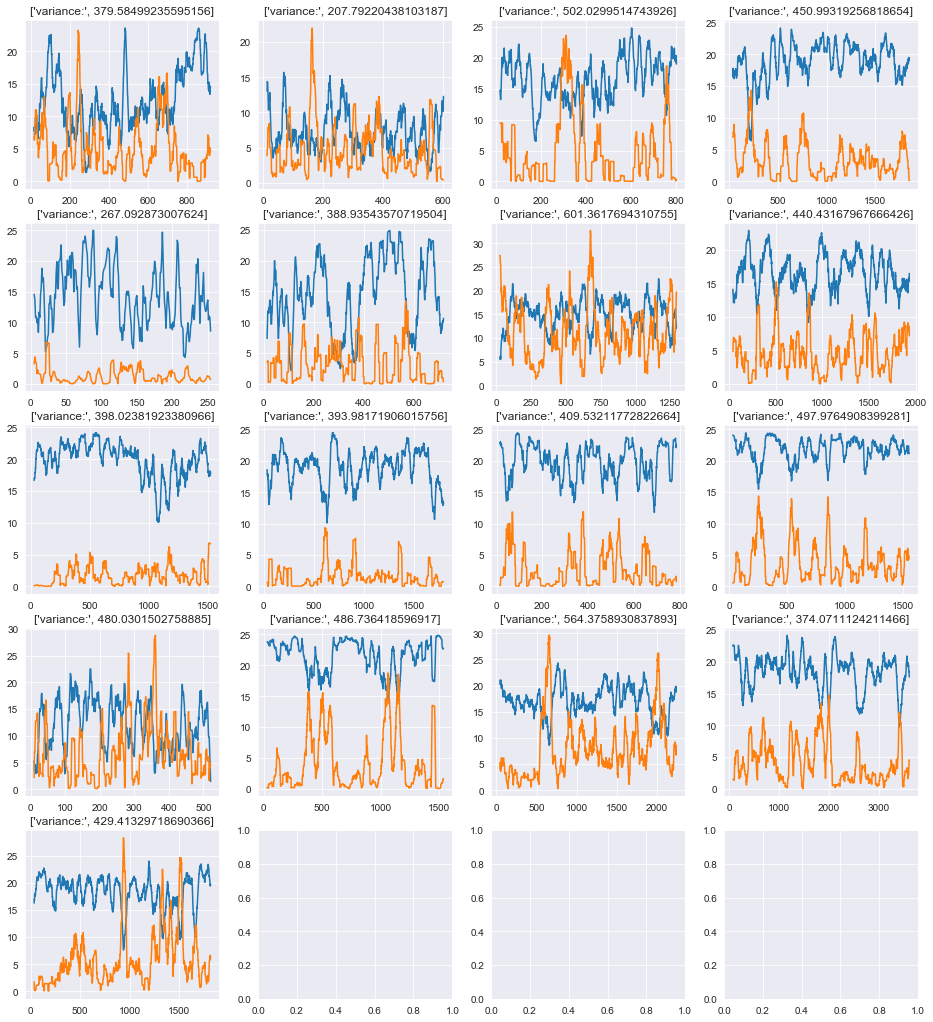

In [445]:
data = dataframes
fig, axs = plt.subplots(5, 4, figsize=(16, 18))

axs[0, 0].plot(dataframes[0]["neg_val_roll"])
axs[0, 0].plot(dataframes[0]["pos_val_roll"])
axs[0, 0].set_title(label = ['variance:',video_stats["avg_variance"][0]])

axs[0, 1].plot(dataframes[1]["neg_val_roll"])
axs[0, 1].plot(dataframes[1]["pos_val_roll"])
axs[0, 1].set_title(label = ['variance:',listofvars[1]])

axs[0, 2].plot(dataframes[2]["neg_val_roll"])
axs[0, 2].plot(dataframes[2]["pos_val_roll"])
axs[0, 2].set_title(label = ['variance:',listofvars[2]])

axs[0, 3].plot(dataframes[3]["neg_val_roll"])
axs[0, 3].plot(dataframes[3]["pos_val_roll"])
axs[0, 3].set_title(label = ['variance:',listofvars[3]])

axs[1, 0].plot(dataframes[4]["neg_val_roll"])
axs[1, 0].plot(dataframes[4]["pos_val_roll"])
axs[1, 0].set_title(label = ['variance:',listofvars[4]])

axs[1, 1].plot(dataframes[5]["neg_val_roll"])
axs[1, 1].plot(dataframes[5]["pos_val_roll"])
axs[1, 1].set_title(label = ['variance:',listofvars[5]])

axs[1, 2].plot(dataframes[6]["neg_val_roll"])
axs[1, 2].plot(dataframes[6]["pos_val_roll"])
axs[1, 2].set_title(label = ['variance:',listofvars[6]])

axs[1, 3].plot(dataframes[7]["neg_val_roll"])
axs[1, 3].plot(dataframes[7]["pos_val_roll"])
axs[1, 3].set_title(label = ['variance:',listofvars[7]])

axs[2, 0].plot(dataframes[8]["neg_val_roll"])
axs[2, 0].plot(dataframes[8]["pos_val_roll"])
axs[2, 0].set_title(label = ['variance:',listofvars[8]])

axs[2, 1].plot(dataframes[9]["neg_val_roll"])
axs[2, 1].plot(dataframes[9]["pos_val_roll"])
axs[2, 1].set_title(label = ['variance:',listofvars[9]])

axs[2, 2].plot(dataframes[10]["neg_val_roll"])
axs[2, 2].plot(dataframes[10]["pos_val_roll"])
axs[2, 2].set_title(label = ['variance:',listofvars[10]])

axs[2, 3].plot(dataframes[11]["neg_val_roll"])
axs[2, 3].plot(dataframes[11]["pos_val_roll"])
axs[2, 3].set_title(label = ['variance:',listofvars[11]])

axs[3, 0].plot(dataframes[12]["neg_val_roll"])
axs[3, 0].plot(dataframes[12]["pos_val_roll"])
axs[3, 0].set_title(label = ['variance:',listofvars[12]])

axs[3, 1].plot(dataframes[13]["neg_val_roll"])
axs[3, 1].plot(dataframes[13]["pos_val_roll"])
axs[3, 1].set_title(label = ['variance:',listofvars[13]])

axs[3, 2].plot(dataframes[14]["neg_val_roll"])
axs[3, 2].plot(dataframes[14]["pos_val_roll"])
axs[3, 2].set_title(label = ['variance:',listofvars[14]])

axs[3, 3].plot(dataframes[15]["neg_val_roll"])
axs[3, 3].plot(dataframes[15]["pos_val_roll"])
axs[3, 3].set_title(label = ['variance:',listofvars[15]])

axs[4, 0].plot(dataframes[16]["neg_val_roll"])
axs[4, 0].plot(dataframes[16]["pos_val_roll"])
axs[4, 0].set_title(label = ['variance:',listofvars[16]])

plt.savefig(r'C:\Users\chazzers\Desktop\Recordings\Results\Graphs\post_stamp_Liz.png',dpi=1200,bbox_inches='tight')